# Plots for paper

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import sys
import json 
import pandas as pd 
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package

In [11]:
from plotting import plot_custom_corner

In [14]:
def plot_all_corners(path,seed,save_id):


    #default values of GW parameters
    ranges=[(4e-7,6e-7),(-np.pi,np.pi),(0.0+1.0,np.pi+1.0),(0.0,np.pi/2.0),(-np.pi/2 + 0.8,np.pi/2 + 0.8),(0.0,np.pi),(0.5e-12,1.5e-12)]
    injection_parameters = [5e-7,0.20,2.50,1.0,1.0,1.0,1e-12]
    labels = [r'$\omega$',r'$\Phi_0$',r'$\psi$',r'$\iota$', r'$\delta$',r'$\alpha$',r'h']
    variables_to_plot = ["omega_gw","phi0_gw","psi_gw","iota_gw","delta_gw","alpha_gw", "h"]
    axes_scales = None

    #Corner plot of GW parameters
    plot_custom_corner(path,variables_to_plot,labels,injection_parameters,ranges,axes_scales,savefig=f'{save_id}_GW')




    #Plot f0 
    pulsars = pd.read_csv("../data/NANOGrav_pulsars.csv")
    true_f = pulsars["F0"].to_numpy()


    labels = [r'$f_0$',r'$f_1$',r'$f_2$',r'$f_3$', r'$f_4$']
    idx = len(labels)
    injection_parameters = true_f[0:idx]
    variables_to_plot = ["f00", "f01", "f02", "f03", "f04"]

#    ranges = [(i*0.9,i*1.1) for i in injection_parameters]


    tol = 0.1
    ranges = [(i-np.abs(i*tol),i+np.abs(i*tol)) for i in injection_parameters]


    axes_scales = None
    plot_custom_corner(path,variables_to_plot,labels,injection_parameters,ranges,axes_scales,savefig=f'{save_id}_f' )


    #Plot f1
    true_f = pulsars["F1"].to_numpy()

    labels = [r'$\dot{f}_0$',r'$\dot{f}_1$',r'$\dot{f}_2$',r'$\dot{f}_3$', r'$\dot{f}_4$']
    idx = len(labels)
    injection_parameters = true_f[0:idx]
    variables_to_plot = ["fdot0", "fdot1", "fdot2", "fdot3", "fdot4"]

    tol = 0.01
    ranges = [(i-np.abs(i*tol),i+np.abs(i*tol)) for i in injection_parameters]
    axes_scales = None
    plot_custom_corner(path,variables_to_plot,labels,injection_parameters,ranges,axes_scales,savefig=f'{save_id}_fdot')


    #Plot sigma_p, log scaled
    generator = np.random.default_rng(seed)
    σp = generator.uniform(low = 1e-21,high=1e-19,size=len(true_f))

        
    labels = [r'$\sigma_p^0$',r'$\sigma_p^1$',r'$\sigma_p^2$',r'$\sigma_p^3$', r'$\sigma_p^4$']
    idx = len(labels)
    injection_parameters = σp[0:idx]
    variables_to_plot    = ["sigma_p0", "sigma_p1", "sigma_p2", "sigma_p3", "sigma_p4"]
    ranges = [(1e-22,1e-18) for i in injection_parameters]




    plot_custom_corner(path,variables_to_plot,labels,injection_parameters,ranges,axes_scales,savefig=f'{save_id}_sigma_p',logscale=True)




The evidence is: -538390.4589345414
Number of samples:
9014
Truths/Medians/Variances
$\omega$ 5e-07 5.000234522286142e-07 2.2883738792873465e-23
$\Phi_0$ 0.2 0.1992964000823051 6.904913459593882e-07
$\psi$ 2.5 2.5936897969277437 3.460670875229759e-07
$\iota$ 1.0 0.3535928017319755 0.0005864212093686112
$\delta$ 1.0 1.0008497357527735 4.0490326277612555e-07
$\alpha$ 1.0 1.0391836859473838 1.9733757745386018e-07
h 1e-12 8.655206880165441e-13 5.474438463930051e-29
running with increased label size


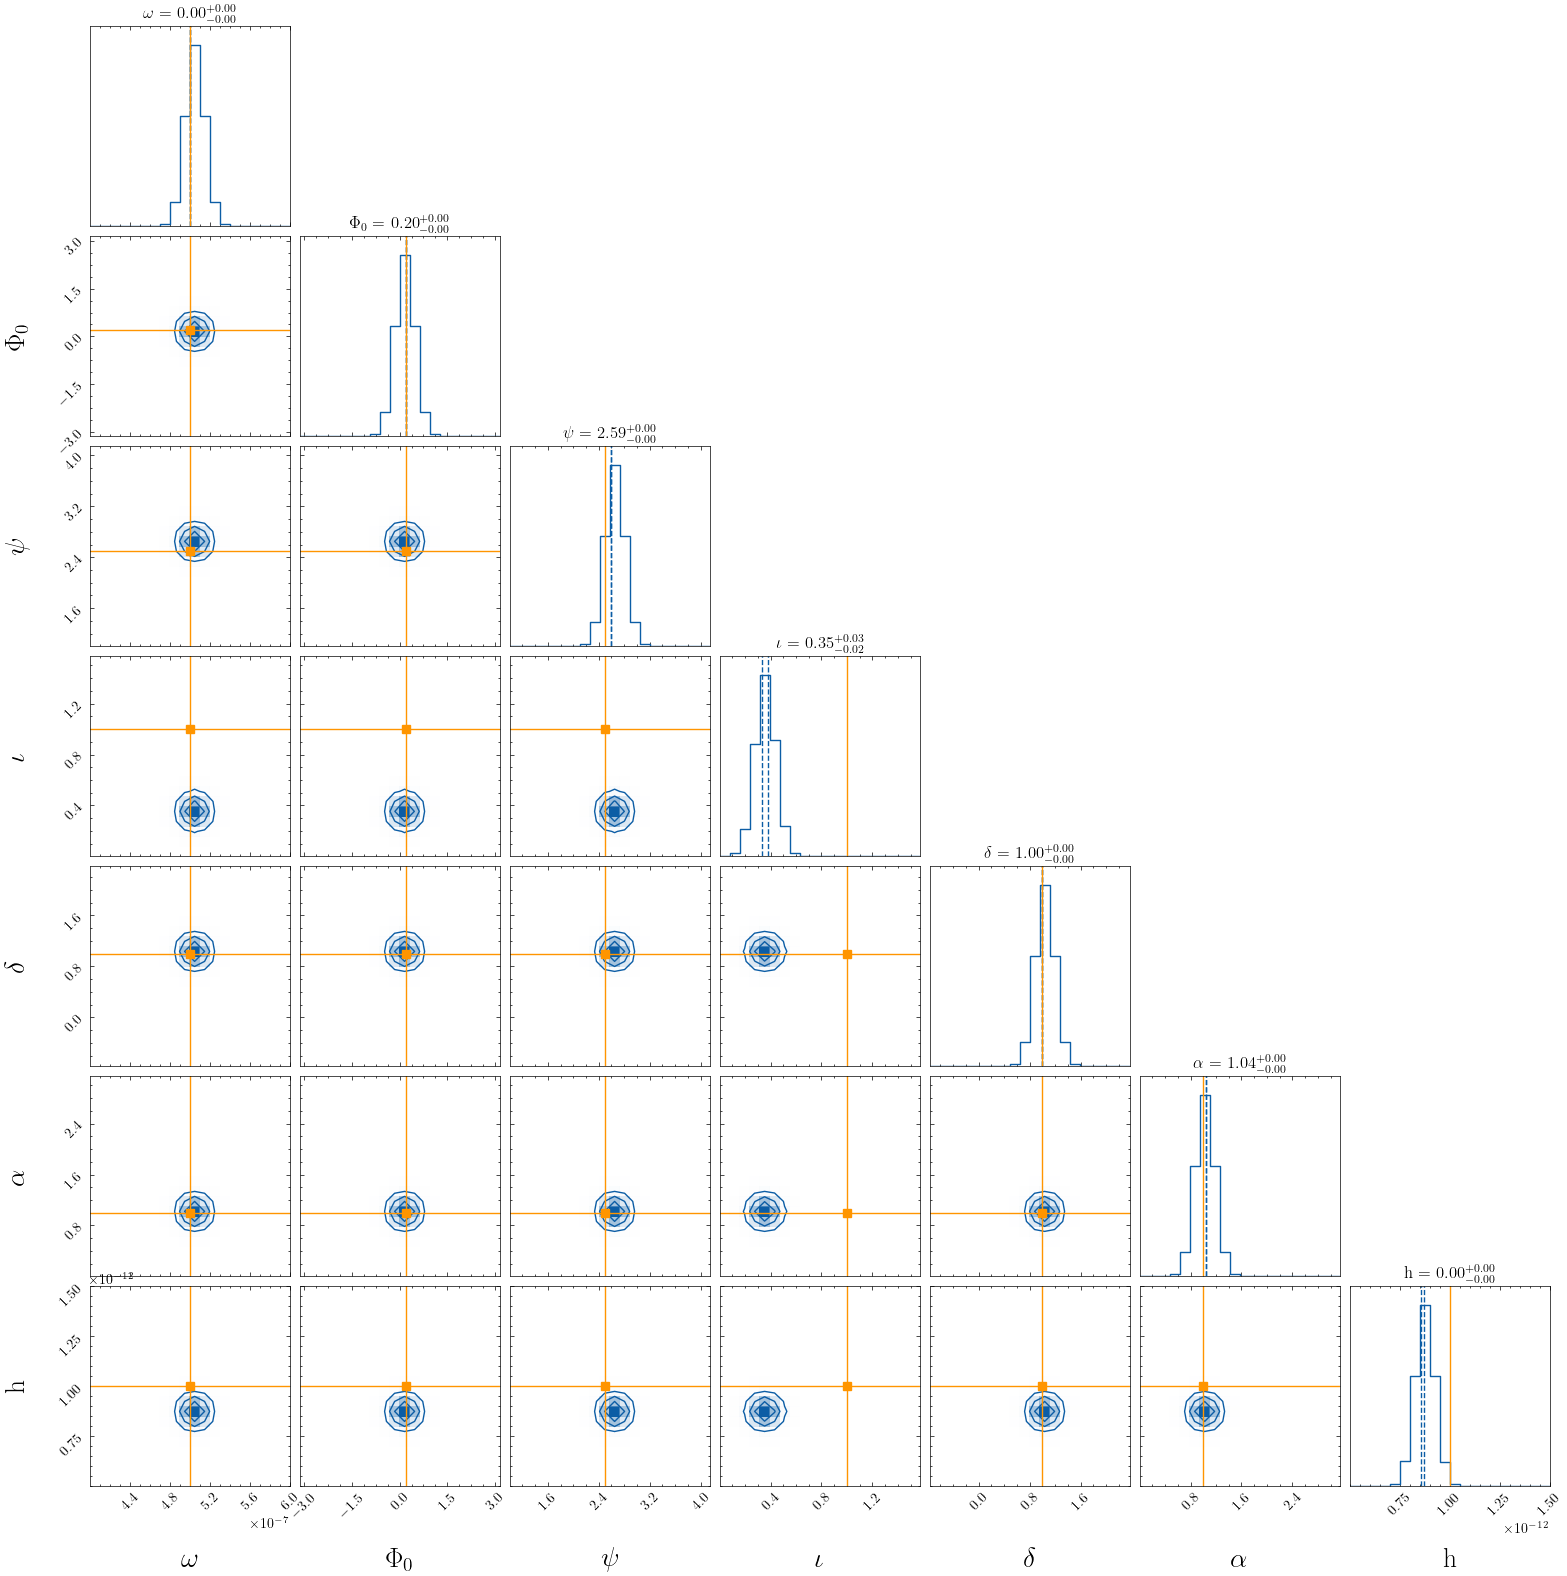

**********************************************************************
The evidence is: -538390.4589345414
Number of samples:
9014
Truths/Medians/Variances
$f_0$ 327.8470205611185 330.3210906248021 0.13648041202230532
$f_1$ 205.53069910059 205.84082500774684 0.14261151536982683
$f_2$ 303.0909794113198 302.6373601569511 1.5335447572677061
$f_3$ 326.600561967271 329.39334646287375 0.08233227956247775
$f_4$ 348.5592316999902 348.46662255095373 2.4976687461338694
running with increased label size


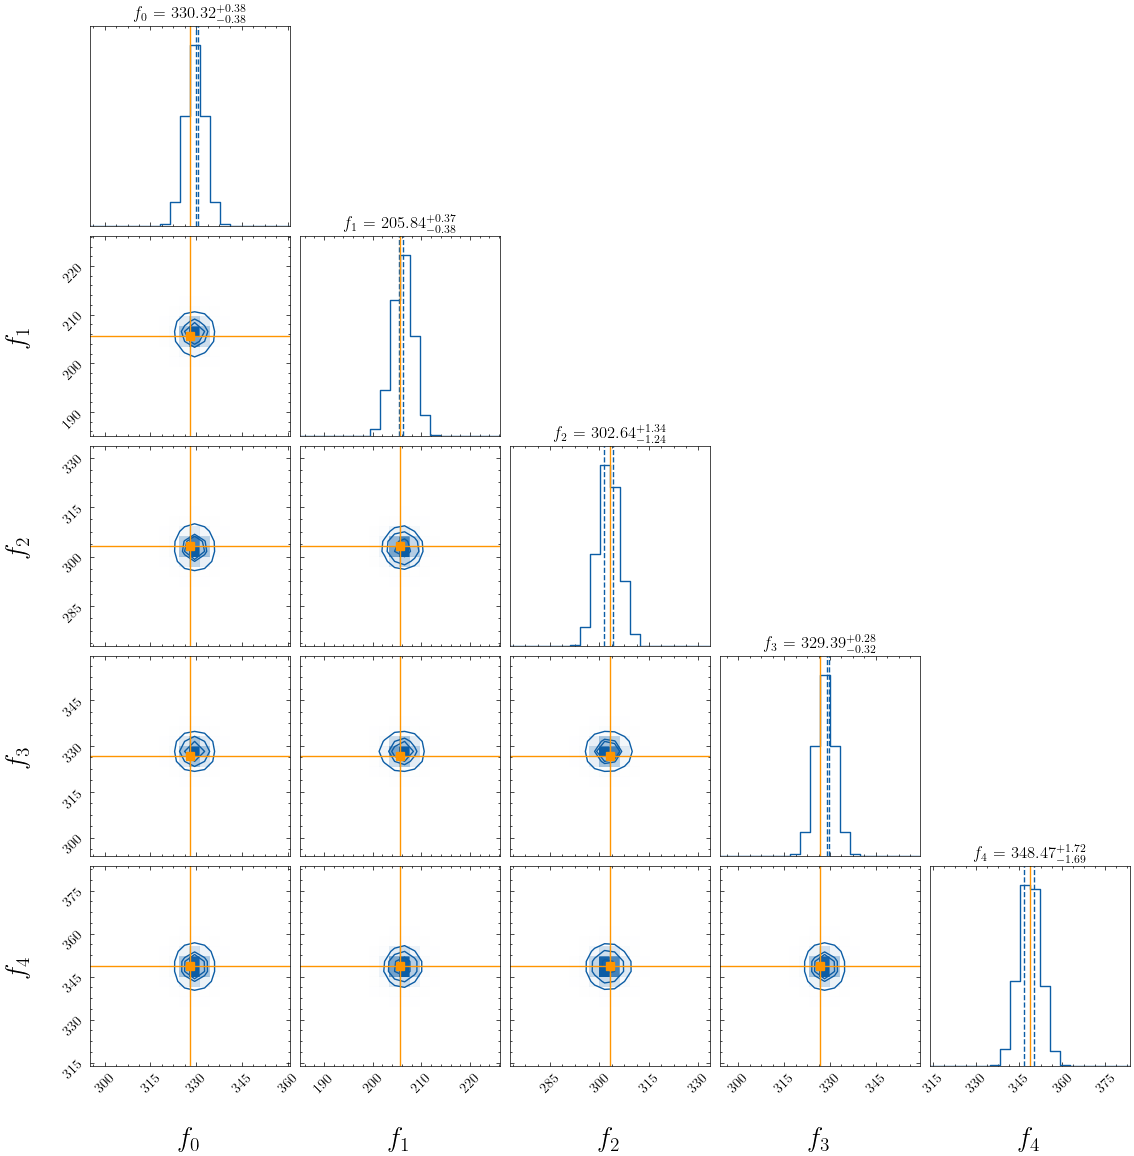

**********************************************************************
The evidence is: -538390.4589345414
Number of samples:
9014
Truths/Medians/Variances
$\dot{f}_0$ -1.227834e-15 -1.2354211539871628e-15 1.0309556395869011e-35
$\dot{f}_1$ -4.297e-16 -4.2791294296832004e-16 2.686889093583242e-36
$\dot{f}_2$ -6.4737e-16 -6.438568688383296e-16 3.932743246574505e-36
$\dot{f}_3$ -1.022991e-15 -1.0190541266483254e-15 1.8126545319836802e-35
$\dot{f}_4$ -4.1895e-16 -4.2035835637085047e-16 2.6835275063716922e-36
running with increased label size


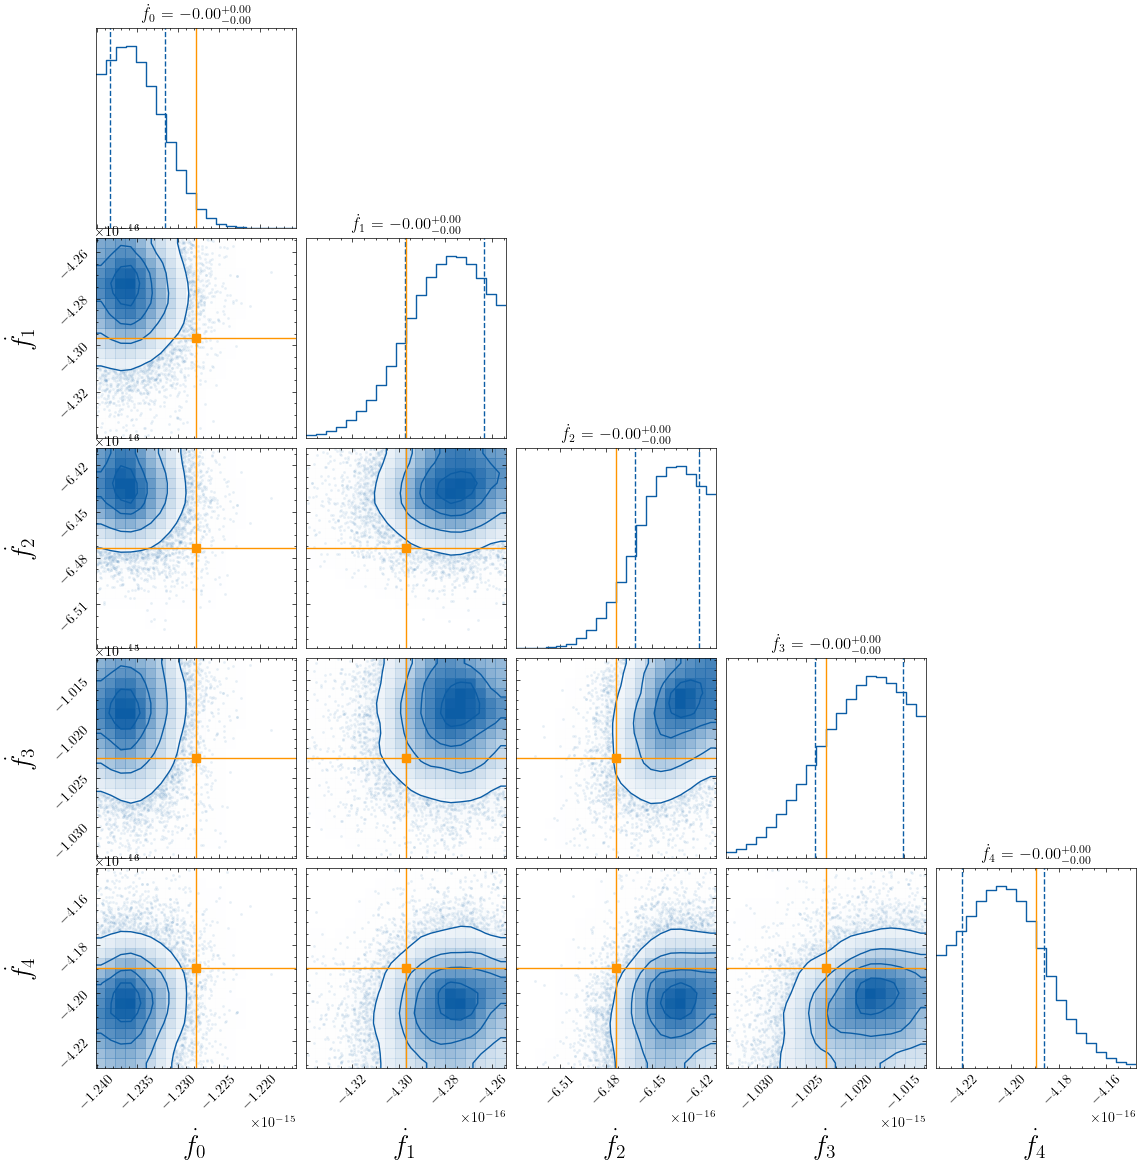

**********************************************************************
The evidence is: -538390.4589345414
Number of samples:
9014
Truths/Medians/Variances
$\sigma_p^0$ 5.054028399366765e-20 2.0190241814996702e-20 4.9176134675082355e-40
$\sigma_p^1$ 6.644933202006474e-20 2.6319737201244965e-20 5.235489447616525e-40
$\sigma_p^2$ 2.4231055016152945e-20 7.046905446800624e-21 1.209562970669994e-40
$\sigma_p^3$ 5.255055881680675e-21 3.055443234648835e-20 6.651663737472743e-40
$\sigma_p^4$ 4.059888409075103e-20 8.929545107093573e-21 1.8464200789075162e-40
running with increased label size


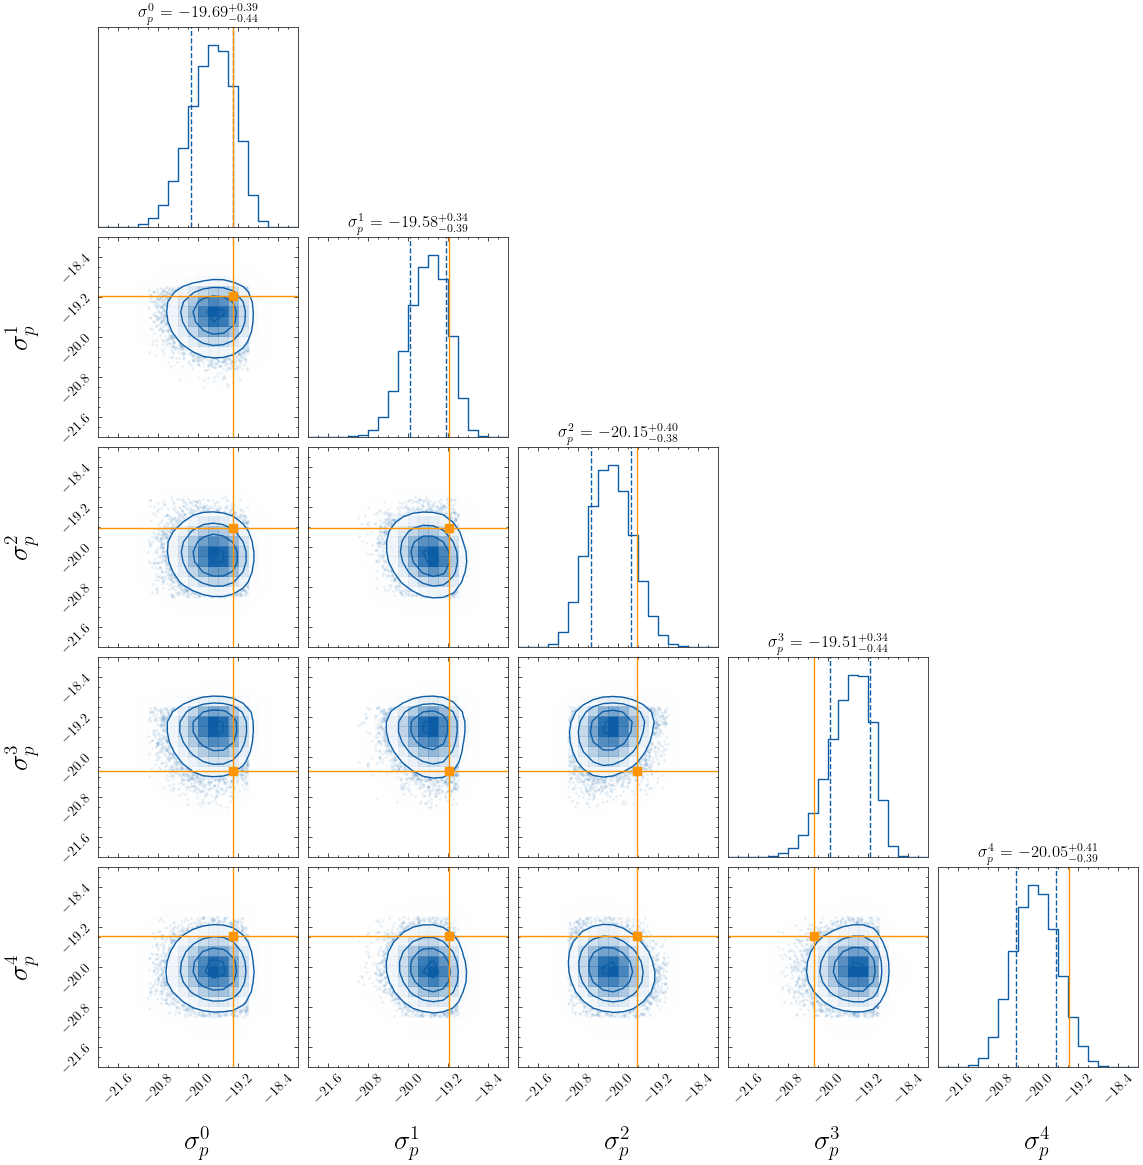

**********************************************************************


In [15]:
import numpy as np 
path = "../data/nested_sampling/data_for_manuscript/paper_canonical_example_earth_terms_1237_result.json"
plot_all_corners(path,1237,save_id='representative_example')